<a href="https://colab.research.google.com/github/harshith242/Mexchange-2/blob/master/Copy_of_YOLOv3_colab_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Fri Feb 19 09:59:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [ ]:
%cd gdrive/My\ Drive/too/TensorFlow-2.x-YOLOv3
!ls

/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3
0353cfce0c0809e7.jpg	  evaluate_mAP.py    README.md
abc.jpg			  IMAGES	     requirements.txt
check.jpg		  LICENSE	     test.mp4
checkpoints		  log		     tools
Collect_training_data.py  mAP		     train.py
deep_sort		  mnist		     ttt.jpg
demo.py			  model_data	     yolov3
detection_custom.py	  object_tracker.py  YOLOv3_colab_training.ipynb
detection_demo.py	  OIDv4_ToolKit
detect_mnist.py		  __pycache__


**Install all required libraries for our project:**

In [ ]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 320.4MB 56kB/s 
     |████████████████████████████████| 320.4MB 58kB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 3.6MB 44.9MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 460kB 40.7MB/s 
     |████████████████████████████████| 7.2MB 37.8MB/s 
     |████████████████████████████████| 552kB 39.6MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=1f4ec26fff6dc729abdb2ffe7459f22de1d5a1ac81e0843e9da5428d82c86558
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERR

**Download yolov3.weights if you don't have it:**

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


'/device:GPU:0'

**Test by loading trained model:**

In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

In [ ]:
image_path   = "./IMAGES/street.jpg'
image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

TypeError: ignored

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [ ]:
%cd OIDv4_ToolKit

/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit


In [ ]:
!ls

convert_annotations.py	images	 main.py  OID	     requirements.txt
convert_to_pascal.py	LICENSE  modules  README.md  voc_to_xml.py


In [ ]:
!python convert_to_pascal.py

Currently in Subdirectory: train

Creating PASCAL VOC XML Files for Class: Scissors
100% 101/101 [01:45<00:00,  1.04s/it]

Creating PASCAL VOC XML Files for Class: Pen
100% 150/150 [02:45<00:00,  1.10s/it]

Creating PASCAL VOC XML Files for Class: Stapler
100% 14/14 [00:15<00:00,  1.13s/it]

Creating PASCAL VOC XML Files for Class: Watch
100% 175/175 [02:56<00:00,  1.01s/it]

Creating PASCAL VOC XML Files for Class: Mobile_phone
100% 200/200 [03:21<00:00,  1.01s/it]

Creating PASCAL VOC XML Files for Class: Bottle
100% 175/175 [03:05<00:00,  1.06s/it]

Creating PASCAL VOC XML Files for Class: Handbag
100% 180/180 [03:01<00:00,  1.01s/it]

Creating PASCAL VOC XML Files for Class: Alarm_clock
100% 54/54 [00:54<00:00,  1.01s/it]

Creating PASCAL VOC XML Files for Class: Backpack
100% 255/255 [04:14<00:00,  1.00it/s]
Currently in Subdirectory: test

Creating PASCAL VOC XML Files for Class: Bottle
100% 30/30 [00:33<00:00,  1.11s/it]

Creating PASCAL VOC XML Files for Class: Backpack
100% 30

In [ ]:
%cd ..
!ls

/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3
0353cfce0c0809e7.jpg	  evaluate_mAP.py    README.md
abc.jpg			  IMAGES	     requirements.txt
check.jpg		  LICENSE	     test.mp4
checkpoints		  log		     tools
Collect_training_data.py  mAP		     train.py
deep_sort		  mnist		     ttt.jpg
demo.py			  model_data	     yolov3
detection_custom.py	  object_tracker.py  YOLOv3_colab_training.ipynb
detection_demo.py	  OIDv4_ToolKit
detect_mnist.py		  __pycache__


In [ ]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train
/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Scissors/05ae2286a8d52c2b.jpg 608,9,950,140,0
/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Scissors/1976c4db345c539e.jpg 161,360,702,476,0
/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Scissors/0f7f16468c061ff3.jpg 551,0,926,282,0
/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Scissors/00d9d08fc21858c3.jpg 0,0,206,144,0 0,369,206,489,0 0,166,208,329,0 0,890,215,1010,0 0,529,225,675,0 0,698,225,854,0 797,774,1023,922,0 801,600,1023,726,0 807,464,1023,566,0 819,104,1023,239,0 819,258,1023,425,0
/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Scissors/2397520628eabfce.jpg 26,21,744,629,0
/content/gdrive/My Drive/too/TensorFlow-2.x-YOLOv3/OIDv4_ToolKit/OID/Dataset/train/Scissors/2b11

**Start training custom model:**

In [ ]:
file_ = open("train.py","r")

In [ ]:
k = file_.read()
print(k)

#================================================================
#
#   File name   : train.py
#   Author      : PyLessons
#   Created date: 2020-08-06
#   Website     : https://pylessons.com/
#   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3
#   Description : used to train custom object detector
#
#================================================================
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import shutil
import numpy as np
import tensorflow as tf
#from tensorflow.keras.utils import plot_model
from yolov3.dataset import Dataset
from yolov3.yolov3 import Create_Yolov3, compute_loss
from yolov3.utils import load_yolo_weights
from yolov3.configs import *
from evaluate_mAP import get_mAP
    
if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

Streaming output truncated to the last 5000 lines.
epoch:34 step:  311/326, lr:0.000023, giou_loss:   0.70, conf_loss:   0.01, prob_loss:   1.04, total_loss:   1.75
epoch:34 step:  312/326, lr:0.000023, giou_loss:   0.63, conf_loss:   0.01, prob_loss:   0.52, total_loss:   1.16
epoch:34 step:  313/326, lr:0.000023, giou_loss:   0.66, conf_loss:   0.09, prob_loss:   0.58, total_loss:   1.33
epoch:34 step:  314/326, lr:0.000023, giou_loss:   1.25, conf_loss:   0.08, prob_loss:   0.49, total_loss:   1.82
epoch:34 step:  315/326, lr:0.000023, giou_loss:   0.18, conf_loss:   0.00, prob_loss:   0.18, total_loss:   0.37
epoch:34 step:  316/326, lr:0.000023, giou_loss:   1.20, conf_loss:   0.07, prob_loss:   0.79, total_loss:   2.06
epoch:34 step:  317/326, lr:0.000023, giou_loss:   0.49, conf_loss:   0.01, prob_loss:   0.35, total_loss:   0.85
epoch:34 step:  318/326, lr:0.000023, giou_loss:   0.48, conf_loss:   0.00, prob_loss:   0.40, total_loss:   0.88
epoch:34 step:  319/326, lr:0.000023,

**Create Yolo v3 custom model and load custom trained weights**

In [ ]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

In [ ]:
!ls

0353cfce0c0809e7.jpg	  evaluate_mAP.py    README.md
abc.jpg			  IMAGES	     requirements.txt
check.jpg		  LICENSE	     test.mp4
checkpoints		  log		     tools
Collect_training_data.py  mAP		     train.py
deep_sort		  mnist		     ttt.jpg
demo.py			  model_data	     yolov3
detection_custom.py	  object_tracker.py  YOLOv3_colab_training.ipynb
detection_demo.py	  OIDv4_ToolKit
detect_mnist.py		  __pycache__


**Test the detection with `IMAGES/plate_2.jpg` image**

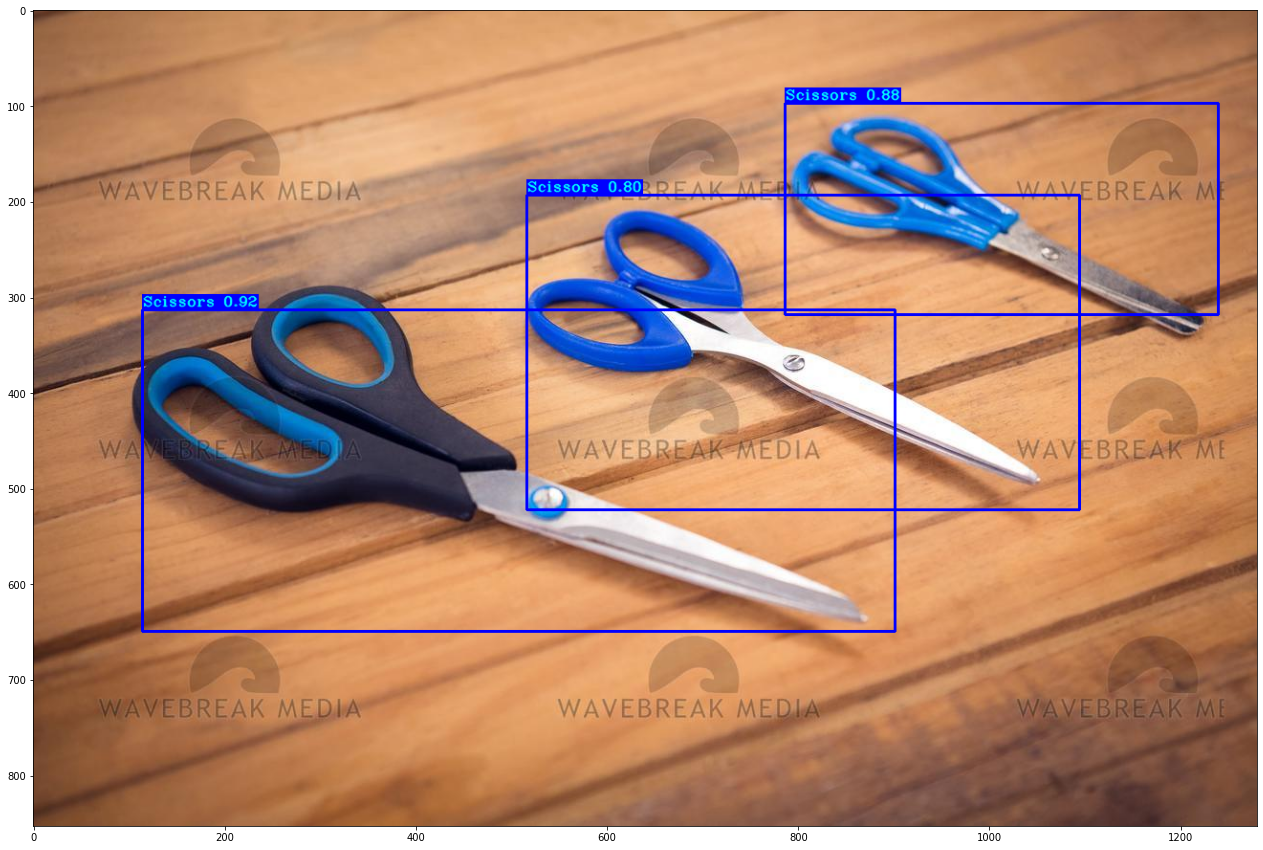

In [ ]:
image_path   = "abc.jpg"
input_labels = ['Scissors']
image = detect_image(yolo, image_path, "", input_labels, input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))[0]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

In [ ]:
!pip install gtts
!pip install playsound
!pip install pyttsx3
!pip install SpeechRecognition
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install PyAudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (194 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 144865 files and directories currently installed.)
Preparing to 

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from yolov3.utils import detect_image, detect_realtime, detect_video, Load_Yolo_model, detect_video_realtime_mp
from yolov3.configs import *
from gtts import gTTS
import os
import playsound
from PIL import Image
import pyttsx3

import speech_recognition as sr
r=sr.Recognizer()
print("please talk:")
with sr.Microphone() as source:
    audio_data=r.record(source,duration=5)
    print("recognizing")
    a=r.recognize_google(audio_data)
    print("Text: "+a)
from nltk.tokenize import word_tokenize 
c=word_tokenize(a) 
things=['Clock','Scissors']
output=[]
for i in range(len(things)):
    for j in range(len(c)):
        if(c[j].capitalize()==things[i]):
            output.append(things[i])
print(output)


import cv2 
  
  
# define a video capture object 
vid = cv2.VideoCapture(0) 
  
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, frame = vid.read() 
  
    # Display the resulting frame 
    cv2.imshow('frame', frame) 
    cv2.imwrite('hello.jpg', frame)   
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows()




image_path   = "hello.jpg"
video_path   = "./test.mp4"

input_labels = output
position = ""
if(len(input_labels)> 0):
	yolo = Load_Yolo_model()
	image, coords,img_h,img_w, outputs = detect_image(yolo, image_path, "./IMAGES/plate_1_detect.jpg", input_labels, input_size=YOLO_INPUT_SIZE, show=True, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
	#detect_video(yolo, video_path, './IMAGES/detected.mp4', input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
	#detect_realtime(yolo, '', input_size=YOLO_INPUT_SIZE, show=True, CLASSES=TRAIN_CLASSES, rectangle_colors=(255, 0, 0))
	if(len(coords) > 0):
		num_objs = len(coords)
		count = 0
		im = Image.open("./IMAGES/plate_1_detect.jpg")
		im.show()
		
		engine = pyttsx3.init()
		rate = engine.getProperty('rate')   # getting details of current speaking rate
        #printing current voice rate
		engine.setProperty('rate', 150) 
		for coordinates in coords:
			x1 = coordinates[0]
			x2 = coordinates[1]
			y1 = coordinates[2]
			y2 = coordinates[3]
			obj = outputs[0]
			position ="Object " + str(count + 1) + " " +  outputs[count] + " at "
			if(y2 <= img_h/2 or (y1 <= img_h/4 and y2 <= 3*img_h/4)):
				position = position + "Top"
			elif(y1>img_h/4 and y2<3*img_h/4):
				position = position + "Middle"
			else:
				position = position + "Bottom"
			if(x2<=img_w/2 or (x1 <= img_h/4 and x2<= 3*img_w/4)):
				position = position + " and Left of image"
			elif(x1<img_w/4 and x2<3*img_w/4):
				position = position + " and Center of image"
			else:
				position = position + " and Right of image"
			count = count + 1
			
			engine.say(position)
			engine.runAndWait()

			#myobj = gTTS(text=position, lang='en', slow=True)			
			
			#if os.path.exists("welcome.mp3"):
			#	os.remove("welcome.mp3")
			#myobj.save("welcome.mp3")
			#playsound.playsound('welcome.mp3', True)	
	else:
		position = position + "No such items found"
	#detect_video_realtime_mp(video_path, "Output.mp4", input_size=YOLO_INPUT_SIZE, show=True, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0), realtime=False)
else:
	position = position + "No such items found"
 
if(position == "No such items found"):
	myobj = gTTS(text=position, lang='en', slow=False)			
	myobj.save("welcome.mp3")
	image = cv2.imread(image_path)
	playsound.playsound('welcome.mp3', False)
	cv2.imshow('image',image)
	cv2.waitKey(0)

please talk:


OSError: ignored